In [1]:
# imports 
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
image = 'image.jpg'
image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
image.shape

(1308, 736)

In [3]:
print('input pixels:', 1308 * 736)

input pixels: 962688


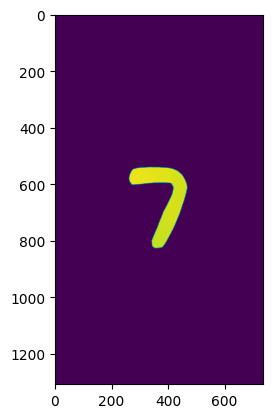

In [4]:
plt.imshow(image)

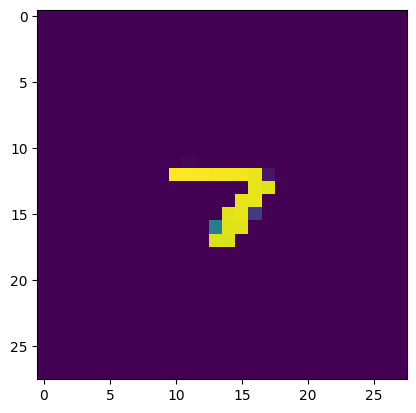

In [5]:
image = cv2.resize(image, (28, 28))
plt.imshow(image)

In [6]:
## normalization
image = image / 255.0
image.shape

(28, 28)


* input layer 
* weigths + biases -> input layer
### Forward Pass
* hidden layers
* activation functions 
* output layer
## Backward Pass
* loss function 
* backpropogation 
* iterative learning 

In [8]:
## we have to flat the pixels like -> 28 * 28 = 784
image = image.flatten()
image = np.expand_dims(image, axis=1)
image.shape

(784, 1)

##  Weights and Biases

In a neural network, every connection between neurons has a weight, which determines the influence one neuron exerts on another. We begin by initializing these weights with small random values.

> *I want to observe how the neural network updates the weights through backpropagation, demonstrating its ability to **learn patterns**.*

**Dimensions of Weights:**
For an input vector `n` (784 for a 28 x 28 image) and a hidden layer with `m` neurons, the weight matrix connecting the input layer to the hidden layer will be sized `m x n`.

**Biases:**
The bias term is a constant added to the weighted sum of inputs. We typically initialize biases to zero rather than random values to allow the model to focus on learning from the weights without introducing unnecessary variability.

In [10]:
neurons = 128

In [11]:
i_w = np.random.randn(neurons, 784) * 0.01 # prevent the network from starting with values that are too large
i_w.shape

(128, 784)

In [12]:
bh = np.zeros((neurons, 1)) # same as hidden shape 
bh.shape

(128, 1)

## forward pass
dot product of input vector and the weight matrix, plus the bias

**hidden_layer = Weights_Matrix . Input_Vector + Bias**\
(128, 1) = (128, 784) . (784, 1) + `(128, 1)`\
hidden_layer = (128, 1) + (128, 1)


**(Note!)** *matrix addition rules -> if matrix order is same*

In [14]:
#  hidden layer
h = np.dot(i_w, image) + bh
h.shape

(128, 1)

## Activation functions
> How they add "**non-linearity** in models which are basically linear?"

Linear function: `H = W . I + b `\
non-linear function: `H = f(W.I + b)` where `f` is the activation function\
basically we're using this to add a uncertainity in our models instead of constant\
Also they prevent the problems like vanishing and exploding gradients


## Perceptron-based network 
which only output 0 and 1 based on the sign of values not the values itself

**Suppose we take all the weights and biases in a network of
perceptrons, and multiply them by a positive constant,Show that the behaviour of the network doesn't change**

> *c ∑wi. xi +b)* where c is the + constant so according to the output rule the value is positive so it will give 1 and not really effecting the network.




**Suppose we have the same setup as the last problem - a network of perceptrons. Suppose also that the overall input to the network of perceptrons has been chosen. We won't need the actual input value; we just need the input to have been fixed. Suppose the weights and biases are such that, for the input to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant c. Show that in the limit as c approaches infinity, the behavior of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when for one of the perceptron's?**

> So in this case we are using sigmoid activation function which is like $f(c) = 1 / 1 + exp(-c)$ so in this case if we the constant is reaching to +inf the $exp(-inf)$ approaches to 0 therefore the output will be 1. and same in the perceptron based network the output depends on the sign of the weighted sum in that case it always be the + constant and output always be 1. 

All hidden layers use the same activation function while the output layer uses another activation function

In [19]:
# reLU 
fh = np.maximum(h, 0)

In [20]:
# output layer 
n_o = 2 ## binary classification (for the sake of simplicity )
w_o = np.random.randn(n_o, neurons) * 0.01 
bo = np.zeros((n_o, 1)) 
bo.shape

(2, 1)

In [21]:
o = np.dot(w_o, h) + bo
e = 1 + np.exp(-o)
y_hat = 1 / e ## sigmoid activation 
print(y_hat)
y_hat[0] + y_hat[1]

[[0.50092796]
 [0.5007127 ]]


array([1.00164067])

In [22]:
## Calculating the loss  
y = np.array([[0]])
y_pred = np.clip(y_hat, 1e-15, 1 - 1e-15) ## to avoid log(0) = undefined
loss = -np.mean(y * np.log(y_pred) + (1 - y)  * np.log(1 - y_pred))
loss

0.6947892164251839

# Backpropogation
calculate the gradients of the loss with respect to each weight in the network and update the weights accordingly.

**But what are even gradients ??**
The rate of change of function w.r.t to its input and the term "**function**" represents loss function. So we wanna see how sensitive the loss is to changes in the model’s parameters (weights and biases).. 

So in this way we have to take partial derivative of loss w.r.t to the model's weights 
> $∇L= ∂L / ∂wi$
​

**Partial Derivative**: *It is a derivative where we take the derivative of a function with respect to one variable while keeping all other variables constant.in the context of neural networks, we have a loss function `𝐿` that depends on multiple parameters (like weights `𝑤1,w2,…,𝑤𝑛`).
the partial derivative of the loss with respect to a particular weight `𝑤𝑖`  tells us how much the loss will change if we change that specific weight while keeping all other weights constant.*

**If this derivative is large, it means small changes to ​will significantly affect the loss. If it’s small, changes to will have little effect on the loss**
## Compute Gradients:
* Step 01: differentiation of loss function w.r.t to predictions
* Step 02: using chain rule because predicted ouput y_hat is influenced by weights here we have composite function (simply function in function) that's why we are applying chain rule in order to calculate the derivative
$$


$$ 
\frac{\partial L}{\partial w_i} = \frac{\partial \hat{y}}{\partial L} \cdot \frac{\partial w_i}{\partial \hat{y}}
$$
> Here, first part represents how the loss changes with respect to the predictions, and second portion shows how changes in the weights affect the predictions.

(**Note!**) *Differentiation is the process of finding the derivative of function while **derivative** is the result of differentiation*


so in neural network that's how we gonna proceed
1. gradient of loss w.r.t to prediction 
2. Calculate the gradients of output layer (its activation function and weights + biases)
3. gradients of hidden layer(w.r.t weights and biases of that hidden layer)\
**(it will tell how much the output layer's predictions  and hidden layer output contributed to the loss)**
4. Update the weight and biases to the point when we reach global minimun of our cost function. (gradient descent)



gonna use `autograd` lib here to calculate the derivatives because i already know how to calculate them :> 


In [27]:
!pip install -q autograd

In [28]:
from autograd import numpy as anp
from autograd import grad

In [29]:
## w.r.t to y_pred
d_y_pred = -(y / y_pred) + (1 - y) / (1 - y_pred)
d_y_pred

array([[2.00371875],
       [2.00285488]])

In [30]:
## for output layer
d_o = d_y_pred * (y_hat * (1 - y_hat)) ## derivative of sigmoid)
d_o

array([[0.50092796],
       [0.5007127 ]])

In [31]:
## for weights and biases in output layer
d_w_o = anp.dot(d_o, h.T)
d_bo = d_o

In [32]:
# Gradient for the hidden layer (using ReLU derivative)
d_h = anp.dot(w_o.T, d_o)
d_h[h <= 0] = 0  # relu derivative

In [33]:
# gradients for input layer weights and biases
d_i_w = anp.dot(d_h, image.T)
d_b_h = d_h

## Connecting Learning Rate and Cauchy-Schwarz Inequality

**Learning Rate**: In gradient descent, the learning rate (or step size) is how much you adjust your position based on the gradient. It's like saying, "I'm going to move this much in the direction that decreases my function."

**Cauchy-Schwarz Inequality**: This inequality helps us understand limits when dealing with vectors, like the gradient and our movement direction. It tells us that the way we combine these vectors (like how we move) has certain boundaries.

*When you're moving based on the gradient, you want to ensure you're not taking too big of a step that could mess up your search for the minimum. The Cauchy-Schwarz inequality helps provide that framework to know what’s a reasonable move.*



### **Cauchy-Schwarz Inequality**

The Cauchy-Schwarz inequality tells us about the relationship between vectors, specifically:

$$  
\mathbf{u} \cdot \mathbf{v} \leq \| \mathbf{u} \| \|\mathbf{v}\| 
$$

suppose we have two lists of numbers(two vectors):

List A: [2,3]\
List B: [4,5]

First, we calculate the left side of the Cauchy-Schwarz inequality, which is the sum of the products of corresponding elements(dot product of vectors) from both lists:
$(2⋅4) + (3⋅5)= 8+15=23$

now the right side which involves finding the sum of squares of each list 

for list A\
$2^2 + 3^2 = 4+9=13$

for list B\
$4^2 + 5^2 = 16 + 25 = 41$

multiply these two sums 
$13 . 41 = 533$

according to cauchy schwarz inequality the square of the sum of products should be less than or equal to the product of sum of the squares\
$(23)^2 \leq 533$ where $(23)^2 = 529$

### **Limits of the Learning Rate**

- **Too Small**: If your learning rate is very small you will take tiny steps while this can ensure stability and precision it means that convergence to the minimum will be very slow and result in long training times especially in large datasets or complex models

- **Too Large**: if the learning rate is too large you risk overshooting the minimum so instead of converging to the lowest point of the function it might bounce back and forth across it or even diverge, meaning your function values keep increasing instead of decreasing


In terms of gradient descent:

- **Vector Direction**: The gradient $\nabla f(x)$ indicates the direction of the steepest ascent. Moving in the opposite direction (for minimization) means taking a step toward reducing the function value.


- **Magnitude of Step**: When you apply the learning rate to the gradient, you're effectively scaling the gradient vector. The Cauchy-Schwarz inequality suggests that the size of your movement (step) should respect the relationship between the gradient's size and direction. This prevents taking steps that are disproportionate to the gradient's direction.

In [38]:
lr = 0.001 ## learning rate 

In [39]:
# update parameters

i_w -= lr * d_i_w
bh -= lr * d_b_h
w_o -= lr * d_w_o
bo -= lr * d_bo

tadaa!